In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(f"../data/combined_for_analysis_sensationalism_jargon_categories_domain_labels.csv")
df_fc_scores = pd.read_csv(f"../data/identifiers_and_abstracts/repo_filtered_data_DOIs_vetle_fc_scores.csv")

In [7]:
df_combined = df.merge(df_fc_scores, on='id', how='inner')
df_combined

,Unnamed: 0,year,month,title_x,link_flair_text,domain,score,num_comments,sensationalism_score,jargon_proportion,...,is_top_domain_unknown,label_voting_lm,label_voting_manual,top_category,title_y,url_y,identifier,sem_scholar_title,sem_scholar_abstract,fc_score
0,5,2018,3,Firearm Injuries Drop 20 Percent When Gun Owne...,Biology,nejm.org,84,22,0.530595,0.000000,...,False,repo,repo,Life Sciences,Firearm Injuries Drop 20 Percent When Gun Owne...,http://www.nejm.org/doi/full/10.1056/NEJMc1712773,DOI:10.1056/NEJMc1712773,Reduction in Firearm Injuries during NRA Annua...,Decline in Firearm Injuries during NRA Convent...,4
1,19,2018,3,Supplementation with probiotics during late pr...,Health,journals.plos.org,8,1,0.482136,0.314286,...,False,scientific,scientific,Life Sciences,Supplementation with probiotics during late pr...,http://journals.plos.org/plosmedicine/article?...,DOI:10.1371/journal.pmed.1002507,Diet during pregnancy and infancy and risk of ...,Background There is uncertainty about the infl...,5
2,33,2018,3,Undisclosed Conflicts of Interests among Biome...,Social Science,ncbi.nlm.nih.gov,263,21,0.511708,0.086957,...,False,repo,repo,Social Sciences,Undisclosed Conflicts of Interests among Biome...,https://www.ncbi.nlm.nih.gov/pubmed/29400625,PMID:29400625,Undisclosed conflicts of interest among biomed...,ABSTRACT Background: Textbooks are a formative...,5
3,53,2018,3,One more species of Tardigrade (famed for thei...,Animal Science,journals.plos.org,37,8,0.525921,0.000000,...,False,scientific,scientific,Life Sciences,One more species of Tardigrade (famed for thei...,http://journals.plos.org/plosone/article?id=10...,DOI:10.1371/journal.pone.0192210,An integrative description of Macrobiotus shon...,Tardigrade research in Japan dates back over 1...,2
4,57,2018,3,There's a20% reduction in gun injuries during ...,Health,nejm.org,14,7,0.478481,0.058824,...,False,repo,repo,Life Sciences,There's a20% reduction in gun injuries during ...,http://www.nejm.org/doi/full/10.1056/NEJMc1712773,DOI:10.1056/NEJMc1712773,Reduction in Firearm Injuries during NRA Annua...,Decline in Firearm Injuries during NRA Convent...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,197738,2019,10,"Statements about building walls, deportation a...",Social Science,journals.plos.org,0,4,0.554148,0.263158,...,False,scientific,scientific,Social Sciences,"Statements about building walls, deportation a...",https://journals.plos.org/plosone/article?id=1...,DOI:10.1371/journal.pone.0222837,Declared impact of the US President’s statemen...,"Statements about building walls, deportation a...",5
5754,197742,2019,10,Many college students will uncritically accept...,Social Science,journals.plos.org,170,25,0.543118,0.100000,...,False,scientific,scientific,Social Sciences,Many college students will uncritically accept...,https://journals.plos.org/plosone/article?id=1...,DOI:10.1371/journal.pone.0223736,When calculators lie: A demonstration of uncri...,Calculators are often unnecessary to solve rou...,4
5755,197760,2019,10,New method for making polymers with perfectly ...,Chemistry,pubs.acs.org,148,8,0.503372,0.171429,...,False,repo,repo,Physical Sciences,New method for making polymers with perfectly ...,https://pubs.acs.org/doi/10.1021/jacs.9b08240,DOI:10.1021/jacs.9b08240,Homogenous Synthesis of Monodisperse High Olig...,Whereas monodisperse polymers are ubiquitous i...,4
5756,197779,2019,10,Research Shows That Doing a Bad Job Wrapping P...,Social Science,onlinelibrary.wiley.com,175,15,0.589604,0.000000,...,False,scientific,scientific,Social Sciences,Research Shows That Doing a Bad Job Wrapping P...,https://onlinelibrary.wiley.com/doi/epdf/10.10...,DOI:10.1002/jcpy.1140,Presentation Matters: The Effect of Wrapping N...,While gift-givers typically wrap gifts prior t...,2


In [43]:
filtered_df = df_combined[(df_combined['score'] > 1) & (df_combined['jargon_proportion'] > 0)]

In [44]:
filtered_df

,Unnamed: 0,year,month,title_x,link_flair_text,domain,score,num_comments,sensationalism_score,jargon_proportion,...,label_voting_lm,label_voting_manual,top_category,title_y,url_y,identifier,sem_scholar_title,sem_scholar_abstract,fc_score,num_words
1,19,2018,3,Supplementation with probiotics during late pr...,Health,journals.plos.org,8,1,0.482136,0.314286,...,scientific,scientific,Life Sciences,Supplementation with probiotics during late pr...,http://journals.plos.org/plosmedicine/article?...,DOI:10.1371/journal.pmed.1002507,Diet during pregnancy and infancy and risk of ...,Background There is uncertainty about the infl...,5,35
2,33,2018,3,Undisclosed Conflicts of Interests among Biome...,Social Science,ncbi.nlm.nih.gov,263,21,0.511708,0.086957,...,repo,repo,Social Sciences,Undisclosed Conflicts of Interests among Biome...,https://www.ncbi.nlm.nih.gov/pubmed/29400625,PMID:29400625,Undisclosed conflicts of interest among biomed...,ABSTRACT Background: Textbooks are a formative...,5,23
4,57,2018,3,There's a20% reduction in gun injuries during ...,Health,nejm.org,14,7,0.478481,0.058824,...,repo,repo,Life Sciences,There's a20% reduction in gun injuries during ...,http://www.nejm.org/doi/full/10.1056/NEJMc1712773,DOI:10.1056/NEJMc1712773,Reduction in Firearm Injuries during NRA Annua...,Decline in Firearm Injuries during NRA Convent...,4,17
5,130,2018,3,People who gain positive beliefs about aging f...,Psychology,doi.org,59,3,0.535586,0.173913,...,repo,repo,Social Sciences,People who gain positive beliefs about aging f...,https://doi.org/10.1371/journal.pone.0191004,DOI:10.1371/journal.pone.0191004,Positive age beliefs protect against dementia ...,One of the strongest risk factors for dementia...,5,46
9,239,2018,3,Hip-hop music may be influencing black America...,Social Science,tandfonline.com,17,21,0.588350,0.111111,...,repo,repo,Social Sciences,Hip-hop music may be influencing black America...,https://www.tandfonline.com/doi/full/10.1080/1...,DOI:10.1080/15332640.2018.1430646,MDMA (ecstasy/molly) use among African America...,"ABSTRACT Over the past two decades, the demogr...",4,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5749,197686,2019,10,A simple 5 minute saliva test to detect if som...,Chemistry,pubs.acs.org,2,0,0.568689,0.117647,...,repo,repo,Physical Sciences,A simple 5 minute saliva test to detect if som...,https://pubs.acs.org/doi/10.1021/acs.analchem....,DOI:10.1021/acs.analchem.9b03037,Synthetic Cannabinoid Receptor Agonists Detect...,Synthetic cannabinoid receptor agonists (SCRAs...,3,51
5751,197696,2019,10,Survey of all US general surgery residents sho...,Medicine,nejm.org,477,2,0.563612,0.217391,...,repo,repo,Life Sciences,Survey of all US general surgery residents sho...,https://www.nejm.org/doi/full/10.1056/NEJMsa19...,DOI:10.1056/NEJMsa1903759,"Discrimination, Abuse, Harassment, and Burnout...","BACKGROUND\nPhysicians, particularly trainees ...",5,23
5752,197727,2019,10,Seventy-five mosses and liverworts found froze...,Anthropology,journals.plos.org,34,0,0.536300,0.263158,...,scientific,scientific,Social Sciences,Seventy-five mosses and liverworts found froze...,https://journals.plos.org/plosone/article?id=1...,DOI:10.1371/journal.pone.0223752,Seventy-five mosses and liverworts found froze...,The Iceman site is unique in the bryology of t...,5,19
5754,197742,2019,10,Many college students will uncritically accept...,Social Science,journals.plos.org,170,25,0.543118,0.100000,...,scientific,scientific,Social Sciences,Many college students will uncritically accept...,https://journals.plos.org/plosone/article?id=1...,DOI:10.1371/journal.pone.0223736,When calculators lie: A demonstration of uncri...,Calculators are often unnecessary to solve rou...,4,20


In [45]:
#check correlations among all three metrics
print("FC vs. Jargon: ", stats.spearmanr(filtered_df['fc_score'], filtered_df['jargon_proportion']))
print("FC vs. Sensationalism: ", stats.spearmanr(filtered_df['sensationalism_score'], filtered_df['fc_score']))
print("Jargon vs. Sensationalism", stats.spearmanr(filtered_df['jargon_proportion'], filtered_df['sensationalism_score']))

FC vs. Jargon:  SpearmanrResult(correlation=0.1682300566595454, pvalue=2.1788280262074102e-23)
FC vs. Sensationalism:  SpearmanrResult(correlation=-0.32213697839016003, pvalue=2.1425465546807763e-84)
Jargon vs. Sensationalism SpearmanrResult(correlation=-0.333711084445063, pvalue=8.449454892905883e-91)


/home/dwhickey/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='num_words', ylabel='Count'>

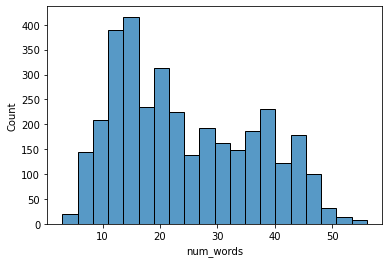

In [46]:
#distribution of title lengths
filtered_df['num_words'] = filtered_df['title_x'].apply(lambda x: len(str(x).split()))

sns.histplot(filtered_df['num_words'])

In [47]:
#do the metrics relate to how long posts are?
print("length vs. Jargon: ", stats.spearmanr(filtered_df['num_words'], filtered_df['jargon_proportion']))
print("length vs. Sensationalism: ", stats.spearmanr(filtered_df['sensationalism_score'], filtered_df['num_words']))
print("length vs. FC", stats.spearmanr(filtered_df['fc_score'], filtered_df['num_words']))

length vs. Jargon:  SpearmanrResult(correlation=-0.3850029421254828, pvalue=1.0993838441333412e-122)
length vs. Sensationalism:  SpearmanrResult(correlation=0.6149982294910439, pvalue=0.0)
length vs. FC SpearmanrResult(correlation=-0.2030750365982645, pvalue=1.547410336021952e-33)


/home/dwhickey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_words', ylabel='sensationalism_score'>

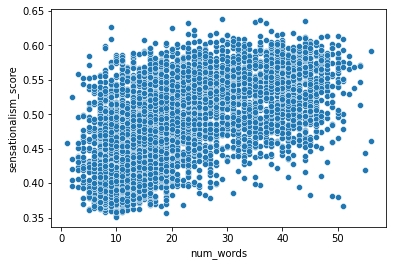

In [18]:
sns.scatterplot(df_combined['num_words'], df_combined['sensationalism_score'])

<AxesSubplot:xlabel='fc_score', ylabel='Count'>

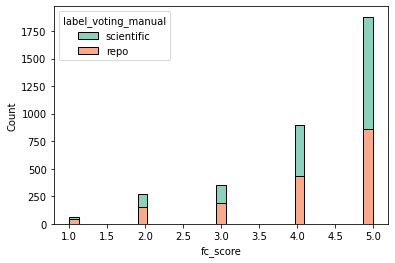

In [48]:
sns.histplot(filtered_df, x='fc_score', hue='label_voting_manual', palette='Set2', multiple='stack')

<Axes: xlabel='label_voting_manual', ylabel='Count'>

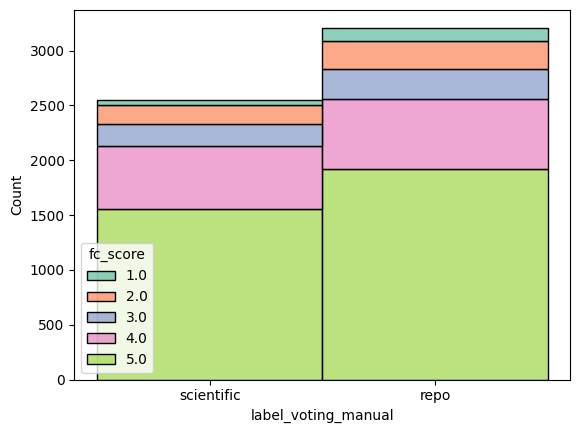

In [29]:
sns.histplot(df_combined, hue='fc_score', x='label_voting_manual', palette='Set2', multiple='stack')


In [34]:
# percentage of posts in repo and scientific that we covered
df_combined[~df_combined['fc_score'].isna()]['label_voting_manual'].value_counts(), df_combined[df_combined['is_top_domain_repo'] | df_combined['is_top_domain_scientific']]['label_voting_manual'].value_counts()

(label_voting_manual
 repo          3210
 scientific    2548
 Name: count, dtype: int64,
 label_voting_manual
 scientific    27132
 repo           6725
 Name: count, dtype: int64)

In [43]:
df_combined[~df_combined['fc_score'].isna() & (df_combined['label_voting_manual'] == 'repo')]['domain'].value_counts()

domain
doi.org                    574
tandfonline.com            551
pubs.acs.org               542
nejm.org                   500
arxiv.org                  374
ncbi.nlm.nih.gov           336
pubmed.ncbi.nlm.nih.gov    308
frontiersin.org             23
bmj.com                      2
Name: count, dtype: int64

In [47]:
df_combined[ (df_combined['label_voting_manual'] == 'repo')]['domain'].value_counts()

domain
ncbi.nlm.nih.gov                 1401
doi.org                          1102
frontiersin.org                   701
pubs.acs.org                      601
tandfonline.com                   583
                                 ... 
10.7554                             1
figshare.com                        1
m.phg.sagepub.com                   1
docs.autismresearchcentre.com       1
sci-hub.cc                          1
Name: count, Length: 531, dtype: int64

In [49]:
pd.merge(df_combined[ (df_combined['label_voting_manual'] == 'repo')]['domain'].value_counts()
, df_combined[~df_combined['fc_score'].isna() & (df_combined['label_voting_manual'] == 'repo')]['domain'].value_counts()
, on='domain', how='outer')

,count_x,count_y
domain,,
0e33611cb8e6da737d5c-e13b5a910e105e07f9070866adaae10b.r15.cf1.rackcdn.com,2,NaN
10.7554,1,NaN
aac.asm.org,13,NaN
aacrjournals.org,11,NaN
aappublications.org,16,NaN
...,...,...
wires.onlinelibrary.wiley.com,2,NaN
zenodo.org,24,NaN
zookeys.pensoft.net,21,NaN


## Let's actually run some analysis on this

<AxesSubplot:xlabel='year', ylabel='fc_score'>

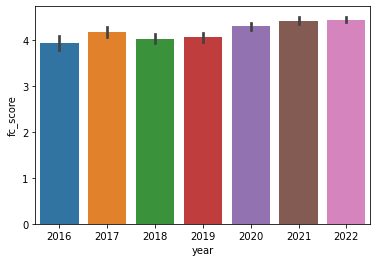

In [49]:
sns.barplot(x='year', y='fc_score', data=filtered_df)

<AxesSubplot:xlabel='month', ylabel='fc_score'>

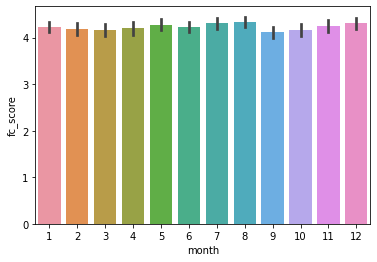

In [50]:
sns.barplot(x='month', y='fc_score', data=filtered_df)

### Factual consistency by field

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Social Sciences'),
  Text(2, 0, 'Physical Sciences'),
  Text(3, 0, 'Engineering & Technology'),
  Text(4, 0, 'Environmental Sciences')])

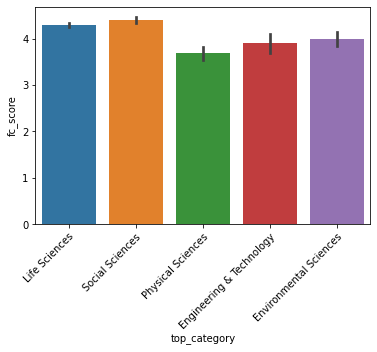

In [51]:
sns.barplot(x='top_category', y='fc_score', data=filtered_df)
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

In [ ]:
#define a "low quality" threshold that binarizes the data. This allows us to see the percentages of factual inconsistencies
filtered_df['low_quality'] = filtered_df['fc_score'] < 3

/home/dwhickey/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Social Sciences'),
  Text(2, 0, 'Physical Sciences'),
  Text(3, 0, 'Engineering & Technology'),
  Text(4, 0, 'Environmental Sciences')])

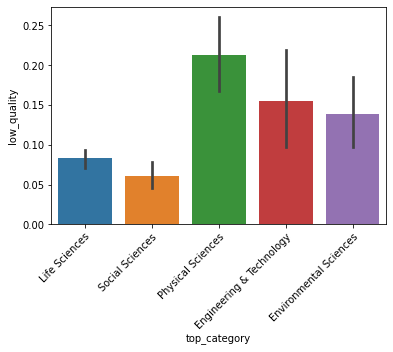

In [64]:
sns.barplot(x='top_category', y='low_quality', data=filtered_df)
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

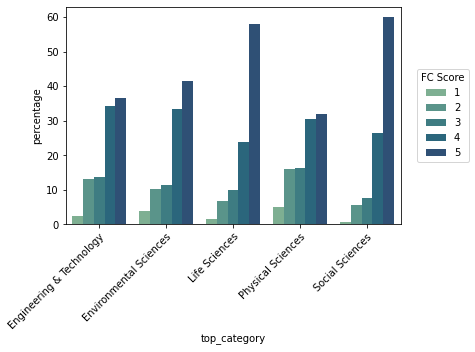

In [75]:
# Calculate percentages
percentages = (
    filtered_df.groupby(['top_category', 'fc_score'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(name='percentage')
)

# Plot using seaborn
sns.barplot(
    data=percentages,
    x='top_category',
    y='percentage',
    hue='fc_score',
    palette='crest'
)

plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

plt.legend(
    title='FC Score',
    bbox_to_anchor=(1.05, 0.5),  # Custom location: (x, y) coordinates
    loc='center left',           # Position relative to bbox_to_anchor
    borderaxespad=0              # Padding between legend and axes
)

### Factual consistency vs. post performance

<Axes: xlabel='fc_score', ylabel='score'>

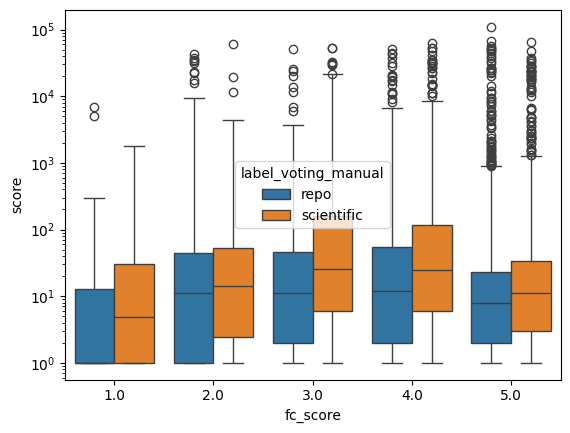

In [56]:

sns.boxplot(df_combined[~df_combined['fc_score'].isna()], x='fc_score', y='score', hue='label_voting_manual', log_scale=True)

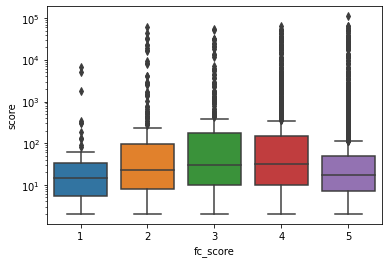

In [52]:
sns.boxplot(x='fc_score', y='score', data=filtered_df)
plt.yscale('log')

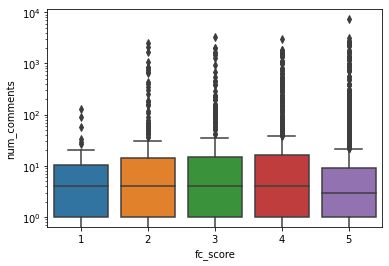

In [53]:
sns.boxplot(x='fc_score', y='num_comments', data=filtered_df)
plt.yscale('log')

<AxesSubplot:xlabel='fc_score', ylabel='sensationalism_score'>

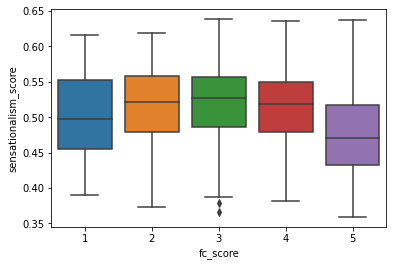

In [54]:
sns.boxplot(x='fc_score', y='sensationalism_score', data=filtered_df)

## Temporal trends

<AxesSubplot:xlabel='year', ylabel='fc_score'>

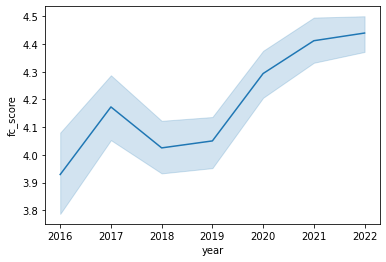

In [55]:
sns.lineplot(x='year', y='fc_score', data=filtered_df)

In [32]:
df_combined[df_combined['fc_score'] == 1][['title_x', 'sem_scholar_abstract']].to_csv('really_bad_titles.csv', index=False)

In [33]:
df_combined[df_combined['fc_score'] == 5][['title_x', 'sem_scholar_abstract']].to_csv('really_good_titles.csv', index=False)